In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 기본 세팅
mpl.rc("font", family='NanumGothic')
plt.rcParams["figure.figsize"] = (12,10)


In [2]:
df1 = pd.read_csv("./Data11.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [3]:
df1.head()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [4]:
df1.tail()

,구매일,구매금액,물품대분류
803670,2020-08-06,30960,더블하트
803671,2020-08-06,6640,더블하트
803672,2020-08-06,5600,더블하트
803673,2020-08-06,7840,더블하트
803674,2020-08-06,8500,기타


# 날짜를 Date 형식으로 바꿔야함

In [5]:
df1['DateTime'] = pd.to_datetime(df1["구매일"])
df1['DateTime'].describe()

/home/jmhwang/miniconda3/envs/adp/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: DateTime, dtype: object

# 연, 월, 주, 일 변환 

In [6]:
df1["year"] = df1["DateTime"].dt.year
df1["month"] = df1["DateTime"].dt.month
df1["week"] = df1["DateTime"].dt.week
df1["day"] = df1["DateTime"].dt.day
df1

/home/jmhwang/miniconda3/envs/adp/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,구매일,구매금액,물품대분류,DateTime,year,month,week,day
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,20
1,2018-04-20,15900,더블하트,2018-04-20,2018,4,16,20
2,2018-04-20,7000,더블하트,2018-04-20,2018,4,16,20
3,2018-04-20,20900,더블하트,2018-04-20,2018,4,16,20
4,2018-05-06,26500,더블하트,2018-05-06,2018,5,18,6
...,...,...,...,...,...,...,...,...
803670,2020-08-06,30960,더블하트,2020-08-06,2020,8,32,6
803671,2020-08-06,6640,더블하트,2020-08-06,2020,8,32,6
803672,2020-08-06,5600,더블하트,2020-08-06,2020,8,32,6
803673,2020-08-06,7840,더블하트,2020-08-06,2020,8,32,6


# 추세(Trend)

## 일별 금액 평균

In [7]:
# sns.lineplot(data=df1, x="DateTime", y="구매금액")

## 일별 금액 합계

In [8]:
# sns.lineplot(data=df1, x="DateTime", y="구매금액", estimator=sum)

## 데이터의 크기가 크므로 lineplot 시간이 오래걸림. `pd.pivot()` 이용

In [9]:
# p1 = pd.pivot_table(data=df1, index="DateTime", values="구매금액", aggfunc='sum').reset_index()

In [10]:
# sns.lineplot(data=p1, x='DateTime', y='구매금액')

In [11]:
p2 = pd.pivot_table(data=df1, index=["DateTime", "물품대분류"], values="구매금액", aggfunc='sum').reset_index()

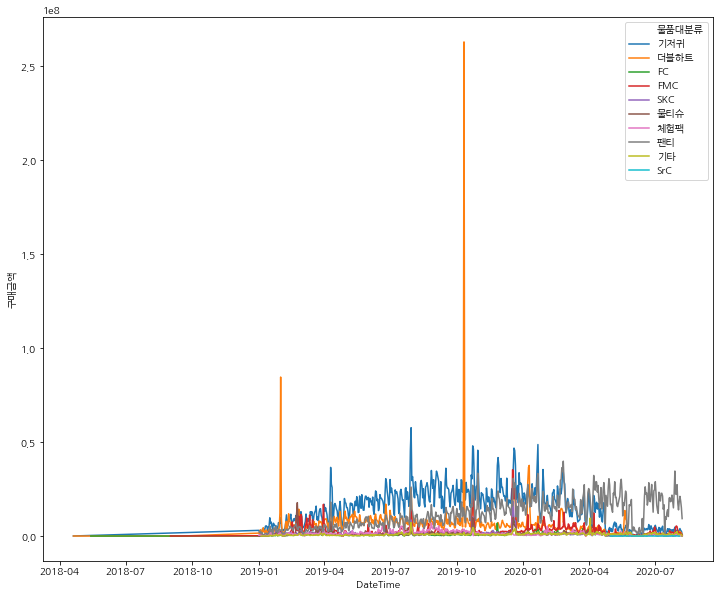

In [12]:
sns.lineplot(data=p2, x='DateTime', y='구매금액', hue="물품대분류")

# 이전 시간이 다음 시간에 어떤 영향을 주는가? 를 찾아가는게 시계열 분석

In [13]:
cond1 = (df1['물품대분류']=="기저귀")
df1.loc[cond1]

,구매일,구매금액,물품대분류,DateTime,year,month,week,day
0,2018-04-20,57120,기저귀,2018-04-20,2018,4,16,20
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,13
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,10
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,6
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,1
...,...,...,...,...,...,...,...,...
803578,2020-06-25,43400,기저귀,2020-06-25,2020,6,26,25
803602,2020-06-26,43400,기저귀,2020-06-26,2020,6,26,26
803610,2020-06-28,49900,기저귀,2020-06-28,2020,6,26,28
803631,2020-07-09,49900,기저귀,2020-07-09,2020,7,28,9


### 해석
- peak가 있는 데이터는 '기저귀'인데
- 기저귀 데이터만 뽑아보니 1행이의 구매일이 너무 동떨어져 있음
- 1행을 삭제한다.

In [14]:
df2 = df1.loc[cond1].iloc[1:]
df2.head()

,구매일,구매금액,물품대분류,DateTime,year,month,week,day
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,13
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,10
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,6
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,1
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,29


# ARIMA

3가지 방법이 혼합된 모델
- AR
    - 특정 시점 전의 자료가 현재 시점 데이터에 영향을 주는 자기회귀모델. ex) 주식
    - 불규칙적인 변동에 영향을 많이 받음
    - ACF: 자기상관함수. 특정 구간 내 데이터간 상관관계를 확인.
    - PACF: 부분자기상관함수. ACF에서 발생할 수 있는 오류를 피함. ex) 두 변수가 외부 요인에 의해 상관성이 있음을 확인
    
- MA
    - 일정한 구간 데이터의 통계량(평균)을 계산해 미래를 예측하는 모델
    - 불규칙적인 변동을 제거할 수 있음
    
- Difference
    - ARIMA는 평균과 분산이 일정한 데이터에만 적용할 수 있는데, 실무에서는 그런 데이터가 없음
    - 정상성을 만족하지 못하는 데이터에 대해서 정상적으로 만들어줌. 그 과정을 차분이라고 함
    - 통계적으로 기술이 가능하도록 차분함으로서 ARIMA를 사용가능

# ARIMA 적용 조건
- 단기예측
- 계절적 변동요인(주기적 변동)
- 샘플 크기가 50이상인 경우
- 데이터가 일정한 트렌드를 갖는 경우
- 그렇지 않은경우 차분을 적용하여 사용

In [15]:
import statsmodels.tsa.api as tsa

# ex) 구매일 다음날의 구매금액은 어떻게 될 것인지 분석

In [16]:
df2.head()

,구매일,구매금액,물품대분류,DateTime,year,month,week,day
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,20,13
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,19,10
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,23,6
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,27,1
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,31,29


# 먼저 일별로 구매금액을 합친다.
- 팁: 시계열 데이터를 다룰 때는 인덱스를 datetime으로 설정하고 난 후 진행하는게 좋은

In [17]:
df_time = pd.pivot_table(data=df2, index='DateTime', values='구매금액', aggfunc='sum')
df_time.head()

,구매금액
DateTime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


# 1일 단위의 평균금액 - 특정 주기 단위로 데이터를 분류

In [18]:
y = df_time["구매금액"].resample('1D').mean()

# 결측값이 존재할 땐, 이전 값 또는 다음 값으로 채워주는게 좋음
- 전체 평균을 넣으면 이질적일 수도 있기 때문

In [19]:
y.isnull().sum()

7

In [20]:
y1 = y.fillna(method='ffill') # 뒷 값 - back
# y.fillna(method='ffill') # 뒷 값 - forward

# 시계열 분해 - seasonal_decomposition
아래 3가지 항목을 확인해 보는 함수
- trend(추세요인)
- seanoality(계절요인)
- cycle(residual)(불규칙 또는 순환요인)

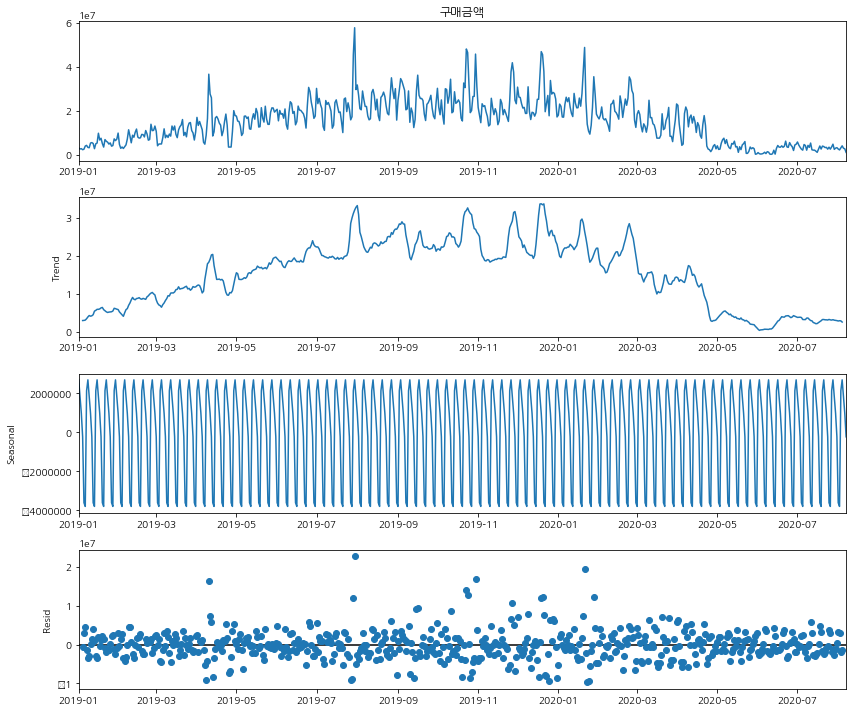

In [21]:
model_series = tsa.seasonal_decompose(y1, model='additive')
fig = model_series.plot()
plt.show()

In [22]:
import itertools

In [23]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [24]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y1, order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_statoionarity=False,
                                        enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81371D+01    |proj g|=  3.55271D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.553D-10   1.814D+01
  F =   18.137132206520832     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

RUNNING THE L-

    4      9     12      1     0     0   1.020D-07   1.665D+01
  F =   16.653835793945639     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68947D+01    |proj g|=  3.55271D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0  

Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     17      1     0     0   3.620D-07   1.670D+01
  F =   16.697366054449315     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.69138D+01    |proj g|=  4.66411D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number

At iterate    0    f=  1.66892D+01    |proj g|=  3.40972D-02

At iterate    5    f=  1.66870D+01    |proj g|=  3.72744D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      9      1     0     0   1.567D-06   1.669D+01
  F =   16.686997803673872     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

In [25]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
# ARIMA_list.to_excel('arima_model_list.xlsx')

# AIC가 낮을수록 좋은 모델

In [26]:
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 12)",19454.499198
47,"(1, 0, 1)","(1, 1, 1, 12)",19454.869618
23,"(0, 1, 0)","(1, 1, 1, 12)",19468.925111
39,"(1, 0, 0)","(1, 1, 1, 12)",19482.426853
35,"(1, 0, 0)","(0, 1, 1, 12)",19482.483365
...,...,...,...
12,"(0, 0, 1)","(1, 0, 0, 12)",20690.529428
9,"(0, 0, 1)","(0, 0, 1, 12)",20741.512537
8,"(0, 0, 1)","(0, 0, 0, 12)",20816.312296
1,"(0, 0, 0)","(0, 0, 1, 12)",20953.280823


# AIC가 가장 낮을 때 파라미터로 모델 학습

In [27]:
mod = tsa.statespace.SARIMAX(y1,order=(1, 0, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5723      0.061      9.334      0.000       0.452       0.692
ma.L1          0.2837      0.073      3.913      0.000       0.142       0.426
ma.S.L12      -0.7830      0.047    -16.755      0.000      -0.875      -0.691
sigma2      4.685e+13   4.08e-16   1.15e+29      0.000    4.69e+13    4.69e+13


# 모델 해석 지표

- 최대우도추정: 특정 데이터가 모수로부터 추출되었을 가능도 (특정 값에 대한 분포의 확률 추정)
    - 연속확률분포의 y값에 해당. AIC는 최대우도를 바탕으로 계산됨
- AIC(Akaike Information Criterion): 데이터에 대한 모델의 상대적 품질
    - -2 * ln(L) + 2k
    - 값이 낮을수록 모형 적합도가 높은 것을 의미한다.
- BIC(Bayes Informationriterion): 데이터에 대한 모델의 상대적 품질
    - -2 * ln(L) + log(n)p
    - 설명변수가 많은 경우에 AIC 보다 많은 페널티를 줘서 계산
- HQIC(Hanna Quinn Information Criterion)
    - -2 * ln(L) + 2k * ln((ln(n))
    - 값이 낮을수록 괜찮은 모델

- order(p,d,q)
    - p: AR에서의 p구간에서의 상관관계
    - d: 차분
    - q: MA에서 PACF 값의 편상관계수
- seasonal order (P,D,Q,M)
    - P: 계절성 주기에서의 패턴이 어떤가.
    - D: 계절성 여부 판단. 0 or 1
    - Q: ACF 기준으로 주기의 패턴(계절성)이 얼마나 반복되는지
    - M: 계절성 주기가 어느정도 있는가? 주기를 나타냄

- 회귀계수가 p-value < 0.05이므로 계수가 유의미하다는 뜻
- z: 통계량에 대한 신뢰구간
- 잔차에 대한 통계량
    - Ljung-Box: 일정 기간동안 관측치가 랜덤이고 독립적인지 여부를 검정
        - 귀무가설: 데이터가 상관관계를 나타내지 않는다. (잔차가 white noise를 따른다.)
        - 대립가설: 데이터가 상관관계를 나타낸다.(잔차가 white noise를 따르지 않아 각 시간대별 잔차가 correlated 된다.)
            - (p-value(귀무가설이 참일 확률) < 0.05)
    - Jarque-Bera: 잔차가 정규성을 따르는지 확인
        - 귀무가설: 잔차가 정규분포와 일치한다. (잔차가 white noise) 시계열을 따른다.)
        - 대립가설: 정규분포와 일치하지 않는다. (p-value < 0.05) -> 어떤 트렌드가 숨겨져 있을 수 있다.
            - 회귀분석에서는 잔차가 정규분포를 띄어야하는 가정이 있음
    - Heteroskedasticity: 잔차(실제값과 예측값의 차이의 모음)가 이분산성을 띠지 않는지. (분산이 같은가 다른가)

- 잔차가 정규분포를 따르는가
    - Kurtosis: 첨도(꼬리가 두꺼운정도). 3에 가까울수록 정규분포와 비슷. K>3이면, 꼬리가 두꺼움
    - Skew: 왜도(비대칭). 0에 가까워야 대칭적임


- warning(표에서 제일 아래 부분)
    - 공분산행렬에 대한 설명
    - 모수의 추정치가 불안함을 의미
        - overfitting
        - 오차의 변동이 심하다

In [28]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               구매금액   No. Observations:                  585
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -9487.619
Date:                            Sat, 12 Mar 2022   AIC                          18983.237
Time:                                    18:19:50   BIC                          19000.542
Sample:                                01-01-2019   HQIC                         18989.995
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5723      0.061      9.334      0.000       0.452       0.692
ma.L1          0.2837      0.073   

# 모델에서 주로 확인해야할 부분
- AIC
- BIC
- HQIC
- 계수들의 p-value
- ARIMA는 회귀분석에서 잔차의 정규성을 무시하고 만들기 때문에 잘 안봄

# 잔차 진단
- 잔차의 정규성 판단
    - 잔차가 백색잡음을 따르는가 (좌상): 잔차의 시계열이 평균 0을 중심으로 무작위로 움직임
    - 히스토그램 (우상): 잔차의 히스토그램이 정규분포와 비슷한지 판단
    - qqplot (좌하): 정규성을 만족한다면 빨간 선에 점들이 분포해야함
    - 잔차에 대한 ACF: 

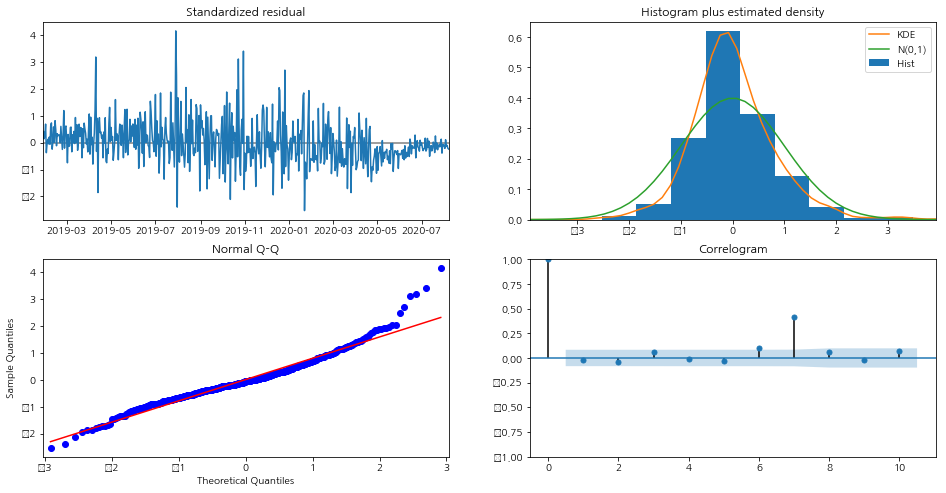

In [29]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [30]:
y1

DateTime
2019-01-01    3051240.0
2019-01-02    2556280.0
2019-01-03    2729480.0
2019-01-04    2238440.0
2019-01-05    2478680.0
                ...    
2020-08-03    3075900.0
2020-08-04    4010200.0
2020-08-05    2937800.0
2020-08-06    2647000.0
2020-08-07    1022300.0
Freq: D, Name: 구매금액, Length: 585, dtype: float64

# 예측값과 실제값의 차이 확인

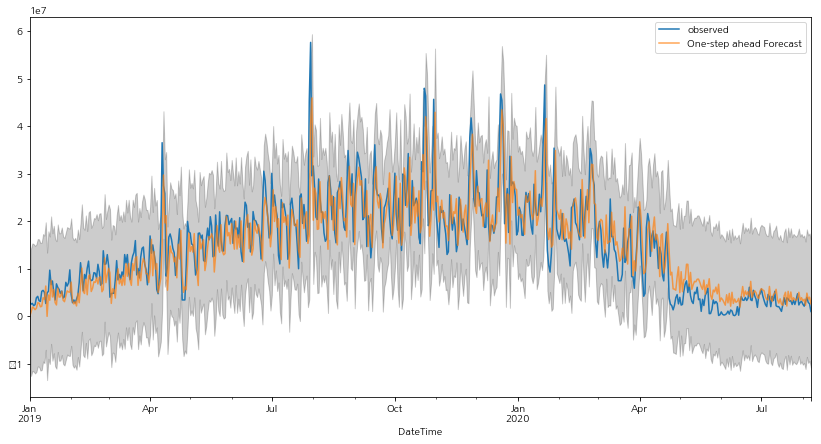

In [31]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

# 테스트 데이터의 예측확인

In [32]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

,DateTime,0
0,2019-01-01,0.000000e+00
1,2019-01-02,8.731028e+05
2,2019-01-03,1.940473e+06
3,2019-01-04,1.785912e+06
4,2019-01-05,1.409431e+06
...,...,...
580,2020-08-03,2.335872e+06
581,2020-08-04,4.887850e+06
582,2020-08-05,3.619436e+06
583,2020-08-06,4.035796e+06


In [33]:
y_forecasted = pred.predicted_mean
y_truth = y1['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 28421926073007.44


In [34]:
pred_uc = results.get_forecast(steps=50)
pred_uc.predicted_mean

2020-08-08    2.325356e+06
2020-08-09    3.341362e+06
2020-08-10    3.482184e+06
2020-08-11    4.524415e+06
2020-08-12    4.764271e+06
2020-08-13    4.171630e+06
2020-08-14    4.358896e+06
2020-08-15    4.086655e+06
2020-08-16    5.111458e+06
2020-08-17    4.296730e+06
2020-08-18    4.663559e+06
2020-08-19    3.752708e+06
2020-08-20    4.247645e+06
2020-08-21    4.441476e+06
2020-08-22    4.111773e+06
2020-08-23    4.884724e+06
2020-08-24    4.970474e+06
2020-08-25    4.289639e+06
2020-08-26    4.426431e+06
2020-08-27    4.125306e+06
2020-08-28    5.133578e+06
2020-08-29    4.309389e+06
2020-08-30    4.670804e+06
2020-08-31    3.756854e+06
2020-09-01    4.250017e+06
2020-09-02    4.442834e+06
2020-09-03    4.112550e+06
2020-09-04    4.885169e+06
2020-09-05    4.970728e+06
2020-09-06    4.289785e+06
2020-09-07    4.426515e+06
2020-09-08    4.125353e+06
2020-09-09    5.133605e+06
2020-09-10    4.309405e+06
2020-09-11    4.670813e+06
2020-09-12    3.756859e+06
2020-09-13    4.250020e+06
2

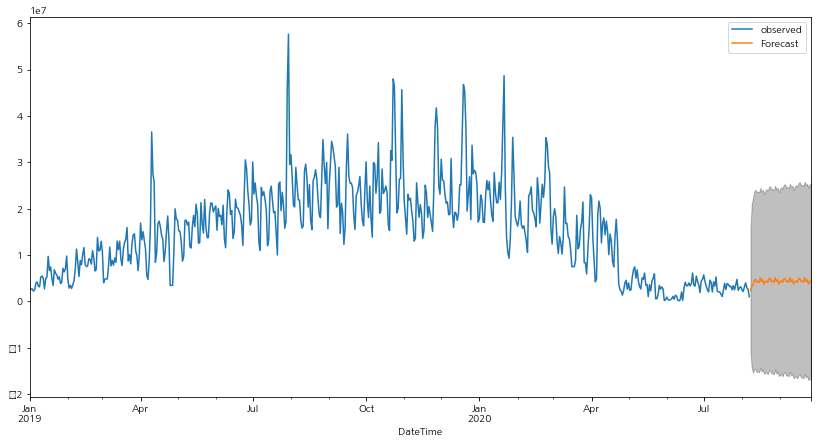

In [35]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()